# SALARY  PREDICTION

In [1]:
#importing pandas library which is used for data manipulation and analysis.
import pandas as pd

In [2]:
#importing numpy library which helps with calculations
import numpy as np

In [3]:
#reading the excel file.
salary = pd.read_csv("data.csv")
#dealing with missing or improper values
salary = salary.replace(to_replace ="?", value ="") 

In [4]:
#for first five columns
salary.head()
#use salary.tail() to view last five columns 

,AGE,CAPITAL-LOSS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,HOURS-PER-WEEK,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CLASS
0,39.0,0,77516,9,13,3,40,4,1,2,2174,1
1,50.0,0,83311,9,13,1,13,3,1,2,0,1
2,38.0,0,215646,8,9,2,40,4,1,2,0,1
3,53.0,0,234721,6,7,1,40,3,4,2,0,1
4,28.0,0,338409,9,13,1,40,1,4,1,0,1


In [5]:
#data information
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AGE             32560 non-null  float64
 1   CAPITAL-LOSS    32561 non-null  int64  
 2   FNLWGT          32561 non-null  int64  
 3   EDUCATION       32561 non-null  int64  
 4   EDUCATION-NUM   32561 non-null  int64  
 5   MARITAL-STATUS  32561 non-null  int64  
 6   HOURS-PER-WEEK  32561 non-null  int64  
 7   RELATIONSHIP    32561 non-null  int64  
 8   RACE            32561 non-null  int64  
 9   SEX             32561 non-null  int64  
 10  CAPITAL-GAIN    32561 non-null  int64  
 11  CLASS           32561 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 3.0 MB


In [6]:
#checking specific features and finding their value count.
salary["SEX"].value_counts()
#1==female and 2==male

2    21790
1    10771
Name: SEX, dtype: int64

In [7]:
#analyzing whole data
salary.describe()

,AGE,CAPITAL-LOSS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,HOURS-PER-WEEK,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CLASS
count,32560.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581603,87.303830,1.897784e+05,8.905316,10.080679,2.077485,40.437456,3.380854,1.363809,1.669205,1077.648844,0.759190
std,13.640640,402.960219,1.055500e+05,2.419509,2.572720,1.185543,12.347429,1.237468,0.936043,0.470506,7385.292085,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,28.000000,0.000000,1.178270e+05,8.000000,9.000000,1.000000,40.000000,3.000000,1.000000,1.000000,0.000000,1.000000
50%,37.000000,0.000000,1.783560e+05,9.000000,10.000000,2.000000,40.000000,3.000000,1.000000,2.000000,0.000000,1.000000
75%,48.000000,0.000000,2.370510e+05,10.000000,12.000000,3.000000,45.000000,4.000000,1.000000,2.000000,0.000000,1.000000
max,90.000000,4356.000000,1.484705e+06,15.000000,16.000000,7.000000,99.000000,6.000000,4.000000,2.000000,99999.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006B6D19E7F0>,
      dtype=object)

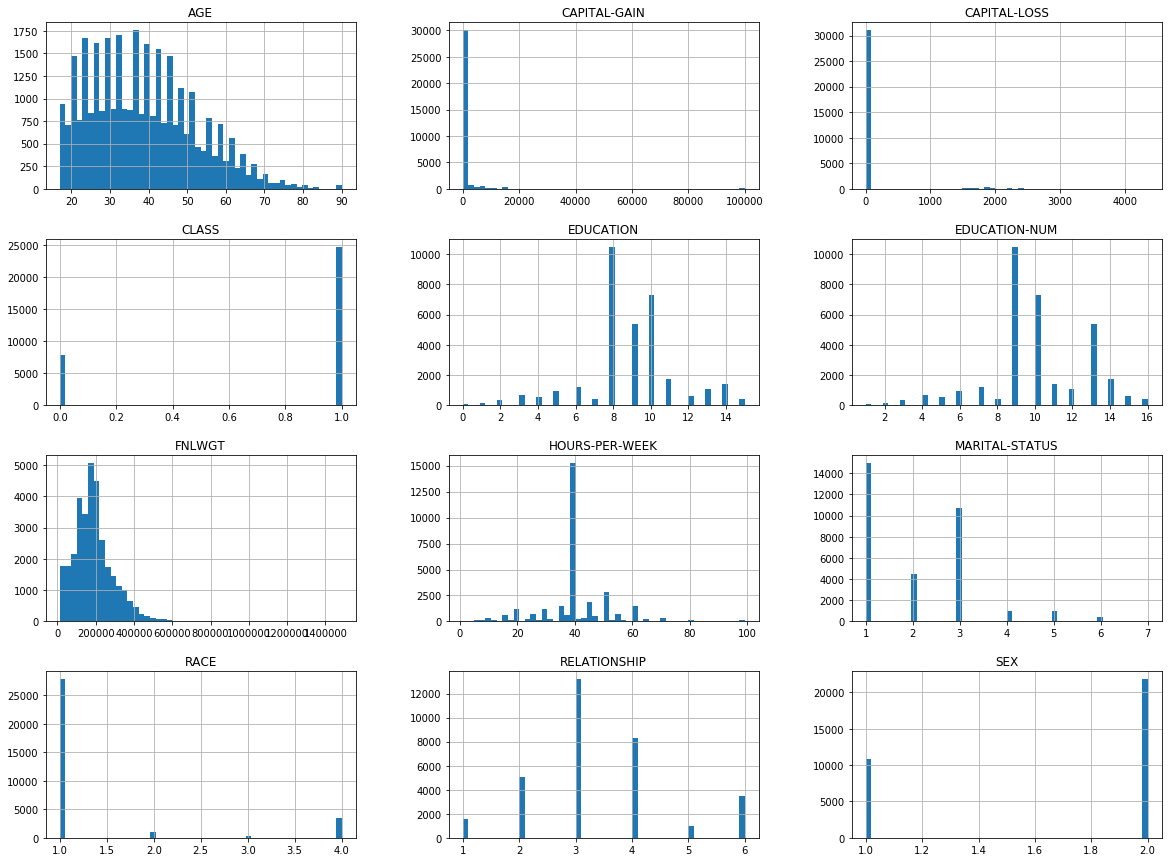

In [8]:
#plotting graphs by using matplotlib library
%matplotlib inline
import matplotlib.pyplot as plt
salary.hist(bins=50, figsize=(20, 15))

In [9]:
#defining a function for dividing whole data into 2 sets training and testing data
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[:test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
#using sklearn library for splitting whole data into testing data and training data
from sklearn.model_selection import train_test_split
#splitting in ration 80% = train and 20% = test
train_set, test_set  = train_test_split(salary, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")
len(salary) #length of actual data

Rows in train set: 26048
Rows in test set: 6513



32561

In [11]:
#testing if a specific feature is divided in the same ratio or not
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(salary, salary['SEX']):
    strat_train_set = salary.loc[train_index]
    strat_test_set = salary.loc[test_index]

In [12]:
strat_test_set['SEX'].value_counts()

2    4359
1    2154
Name: SEX, dtype: int64

In [13]:
strat_train_set['SEX'].value_counts()

2    17431
1     8617
Name: SEX, dtype: int64

In [14]:
4359/2154 #testing data

2.0236768802228413

In [15]:
17431/8617  #training data

2.022861784843913

In [16]:
salary = strat_train_set.copy() #firstly using for training dataset

In [17]:
#checking the correlation of all features with respect to class feature which states whether a salary is above or below 50k
corr_matrix = salary.corr()
corr_matrix['CLASS'].sort_values(ascending=False)

CLASS             1.000000
MARITAL-STATUS    0.378353
RELATIONSHIP      0.173779
RACE              0.095323
FNLWGT            0.007646
CAPITAL-LOSS     -0.158661
EDUCATION        -0.216362
SEX              -0.216546
CAPITAL-GAIN     -0.222175
HOURS-PER-WEEK   -0.229226
AGE              -0.230210
EDUCATION-NUM    -0.334458
Name: CLASS, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006B6E971710>,
      dtype=object)

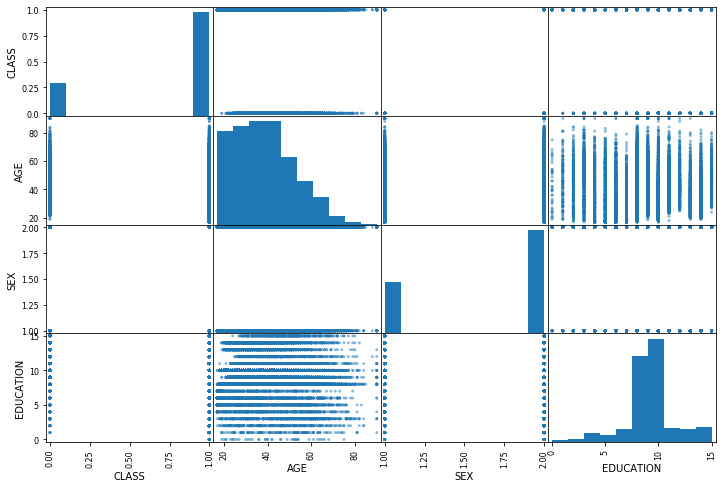

In [18]:
#using scatter plot for 4 features
#comapring featues with one another
from pandas.plotting import scatter_matrix
attributes = ["CLASS", "AGE", "SEX", "EDUCATION"]
scatter_matrix(salary[attributes], figsize = (12,8))

In [19]:
#dropping the feature "class" from actual training data to train the model and keeping it into another variable named salary_labels
salary = strat_train_set.drop("CLASS", axis=1)
salary_labels = strat_train_set["CLASS"].copy()

In [20]:
#Pandas dropna() method allows the user to analyze and drop Rows/Columns with Null values in different ways
a = salary.dropna(subset=["AGE"]) 
a.shape

(26048, 11)

In [21]:
#“axis 0” represents rows and “axis 1” represents columns.
salary.drop("AGE", axis=1).shape

(26048, 10)

In [22]:
median = salary["AGE"].median() 
median

37.0

In [23]:
#filling null values with median
salary["AGE"].fillna(median)

30003    20.0
27833    29.0
17789    42.0
18637    48.0
3423     43.0
         ... 
1841     34.0
14956    61.0
20543    31.0
13018    32.0
22067    48.0
Name: AGE, Length: 26048, dtype: float64

In [24]:
#check number of rows and columns in data
salary.shape

(26048, 11)

In [25]:
salary.describe()

,AGE,CAPITAL-LOSS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,HOURS-PER-WEEK,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN
count,26048.000000,26048.000000,2.604800e+04,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000
mean,38.595478,86.201129,1.895131e+05,8.903601,10.080697,2.074439,40.474163,3.384751,1.361371,1.669188,1043.186387
std,13.635221,399.801138,1.052695e+05,2.409995,2.563977,1.184624,12.343683,1.237771,0.932625,0.470515,7164.871380
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,28.000000,0.000000,1.179620e+05,8.000000,9.000000,1.000000,40.000000,3.000000,1.000000,1.000000,0.000000
50%,37.000000,0.000000,1.781770e+05,9.000000,10.000000,2.000000,40.000000,3.000000,1.000000,2.000000,0.000000
75%,48.000000,0.000000,2.365990e+05,10.000000,12.000000,3.000000,45.000000,4.000000,1.000000,2.000000,0.000000
max,90.000000,4356.000000,1.484705e+06,15.000000,16.000000,7.000000,99.000000,6.000000,4.000000,2.000000,99999.000000


In [26]:
#The SimpleImputer class provides basic strategies for imputing missing values.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") #here we are imputing missing values with median for all features as doing manually as done above for age will be a bigger task. This libray reduces the work.
#The get_dummies() function is used to convert categorical variable into dummy/indicator variables.
salary = pd.get_dummies(salary)

In [27]:
imputer.fit(salary) #imputing data

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [28]:
imputer.statistics_

array([3.70000e+01, 0.00000e+00, 1.78177e+05, 9.00000e+00, 1.00000e+01,
       2.00000e+00, 4.00000e+01, 3.00000e+00, 1.00000e+00, 2.00000e+00,
       0.00000e+00])

In [29]:
X = imputer.transform(salary) #transforming the data after imputing

In [30]:
salary_tr = pd.DataFrame(X, columns=salary.columns)

In [31]:
salary_tr.describe()

,AGE,CAPITAL-LOSS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,HOURS-PER-WEEK,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN
count,26048.000000,26048.000000,2.604800e+04,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000
mean,38.595478,86.201129,1.895131e+05,8.903601,10.080697,2.074439,40.474163,3.384751,1.361371,1.669188,1043.186387
std,13.635221,399.801138,1.052695e+05,2.409995,2.563977,1.184624,12.343683,1.237771,0.932625,0.470515,7164.871380
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,28.000000,0.000000,1.179620e+05,8.000000,9.000000,1.000000,40.000000,3.000000,1.000000,1.000000,0.000000
50%,37.000000,0.000000,1.781770e+05,9.000000,10.000000,2.000000,40.000000,3.000000,1.000000,2.000000,0.000000
75%,48.000000,0.000000,2.365990e+05,10.000000,12.000000,3.000000,45.000000,4.000000,1.000000,2.000000,0.000000
max,90.000000,4356.000000,1.484705e+06,15.000000,16.000000,7.000000,99.000000,6.000000,4.000000,2.000000,99999.000000


In [32]:
# Data pipelines allow you transform data from one representation to another through a series of steps.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    
    ('std_scaler', StandardScaler()),
])


In [33]:
salary_num_tr = my_pipeline.fit_transform(salary)

In [34]:
salary_num_tr.shape

(26048, 11)

In [35]:
#using different supervised learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#try using all models one by one and final the one with better accuracy
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor() 
#comment the other 2 model function when using one
model.fit(salary_num_tr, salary_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
some_data = salary.iloc[:5] #checking for only some data(first 5 rows)

In [37]:
some_labels = salary_labels.iloc[:5]

In [38]:
prepared_data = my_pipeline.transform(some_data)

In [39]:
model.predict(prepared_data) #prediction

array([1.  , 1.  , 0.  , 0.  , 0.97])

In [40]:
list(some_labels) #actual result

[1, 1, 0, 0, 1]

In [41]:
#checking for errors
from sklearn.metrics import mean_squared_error
salary_predictions = model.predict(salary_num_tr)
mse = mean_squared_error(salary_labels, salary_predictions)
rmse = np.sqrt(mse)

In [42]:
rmse #root mean squared errors

0.12356199763527655

In [43]:
#cross_val_score returns score of test fold where cross_val_predict returns predicted y values for the test fold. For the cross_val_score() , you are using the average of the output, which will be affected by the number of folds because then it may have some folds which may have high error (not fit correctly).
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, salary_num_tr, salary_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [44]:
rmse_scores

array([0.32912533, 0.32501414, 0.32835345, 0.32606334, 0.32816171,
       0.32285252, 0.33343898, 0.32811305, 0.32690028, 0.34021508])

In [45]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [46]:
print_scores(rmse_scores)

Scores: [0.32912533 0.32501414 0.32835345 0.32606334 0.32816171 0.32285252
 0.33343898 0.32811305 0.32690028 0.34021508]
Mean:  0.32882378664263684
Standard deviation:  0.004623922441399688


In [47]:
#Joblib is a set of tools to provide lightweight pipelining in Python. In particular, joblib offers: transparent disk-caching of the output values and lazy re-evaluation (memoize pattern) easy simple parallel computing.
from joblib import dump, load
dump(model, 'Salary.joblib') # a file named Salary.joblib will be created

['Salary.joblib']

In [48]:
X_test = strat_test_set.drop("CLASS", axis=1)
Y_test = strat_test_set["CLASS"].copy()
X_test = pd.get_dummies(X_test)

In [49]:
X_test_prepared = my_pipeline.transform(X_test)

In [50]:
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

In [51]:
final_rmse

0.33018347362287154

In [52]:
prepared_data[0]

array([-1.36380884, -0.21561415,  0.21331262,  0.45494702, -0.03147405,
        0.7813264 , -2.06378045, -1.1187672 , -0.38748499, -1.42227346,
       -0.14560016])

In [53]:
#now try to predict output by giving all input required
from joblib import dump, load
import numpy as np
model = load('Salary.joblib') 
#AGE = 39
#Capital-loss = 0
#FNLWGT = 77516
#EDUCATION = 9(bachelors)
#EDUCATION-NUM = 13
#MARITAL-STATUS = 3(never-married)
#HOURS-PER-WEEK = 40
#RELATIONSHIP = 4(not in family)
#RACE =1(white)
#SEX = 2(male)
#CAPITAL-GAIN = 2174
features = np.array([[39, 0, 77516, 9, 13, 3, 40, 4, 1, 2, 2174]])
model.predict(features)

array([0.04])

In [54]:
#if prediction is greater than array([0.5]) : salary is greater than 50k
#if prediction is less than or equal to array([0.5]) : salary is less than or equal to 50k
#try to convert this data into GUI format using tkinter